### Statlog-German Credit Data

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Statlog-German credit card Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Statlog-German credit data/data/german.data-numeric',sep='\s+')
data = pd.DataFrame(dataset)

X = data.iloc[:, 0:24].values
Y = data.iloc[:, -1].values
print(data)
print(X.shape)
print(Y.shape)

     1   6  4  12  5  5.1  3  4.1  1.1  67  ...  0  0.1  1.4  0.2  0.3  1.5  \
0    2  48  2  60  1    3  2    2    1  22  ...  0    0    1    0    0    1   
1    4  12  4  21  1    4  3    3    1  49  ...  0    0    1    0    0    1   
2    1  42  2  79  1    4  3    4    2  45  ...  0    0    0    0    0    0   
3    1  24  3  49  1    3  3    4    4  53  ...  1    0    1    0    0    0   
4    4  36  2  91  5    3  3    4    4  35  ...  0    0    1    0    0    0   
..  ..  .. ..  .. ..  ... ..  ...  ...  ..  ... ..  ...  ...  ...  ...  ...   
994  4  12  2  17  1    4  2    4    1  31  ...  0    0    1    0    0    1   
995  1  30  2  39  1    3  1    4    2  40  ...  0    1    1    0    0    1   
996  4  12  2   8  1    5  3    4    3  38  ...  0    0    1    0    0    1   
997  1  45  2  18  1    3  3    4    4  23  ...  0    0    1    0    0    0   
998  2  45  4  46  2    1  3    4    3  27  ...  0    1    1    0    0    1   

     0.4  0.5  1.6  1.7  
0      0    0    1    2  

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [4]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [5,10,20], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf', 'linear'], 'C': np.logspace(-1, 1, 3), 'gamma':np.logspace(0, 2, 3)},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': range(1,20,2)},
    'RandomForestClassifier': {'n_estimators': [16, 32, 40]},
    'AdaBoostClassifier': {'n_estimators': [16, 32, 50], 'learning_rate':[0.5,0.8,1]},
    'LogisticRegression': {'max_iter':[100,130,140],'C': np.logspace(-2, 2, 5), 'solver':['lbfgs','liblinear']},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(10,),(100,),(30,20)],'activation':['tanh', 'relu']}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=4, cv=3)
    gridcv.fit(X_train, Y_train)
    grid_accuracy_test  = sklearn.metrics.accuracy_score(Y_test,  gridcv.best_estimator_.predict(X_test))
    accuracy[counter] = grid_accuracy_test*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for KNeighborsClassifier: 74.54545454545455
Accuracy for SVC: 79.39393939393939
Accuracy for DecisionTreeClassifier: 71.21212121212122
Accuracy for RandomForestClassifier: 77.27272727272727
Accuracy for AdaBoostClassifier: 75.45454545454545
Accuracy for LogisticRegression: 79.0909090909091
Accuracy for GaussianNB: 75.45454545454545
Accuracy for MLPClassifier: 77.27272727272727


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Statlog-German credit dataset models accuracy')

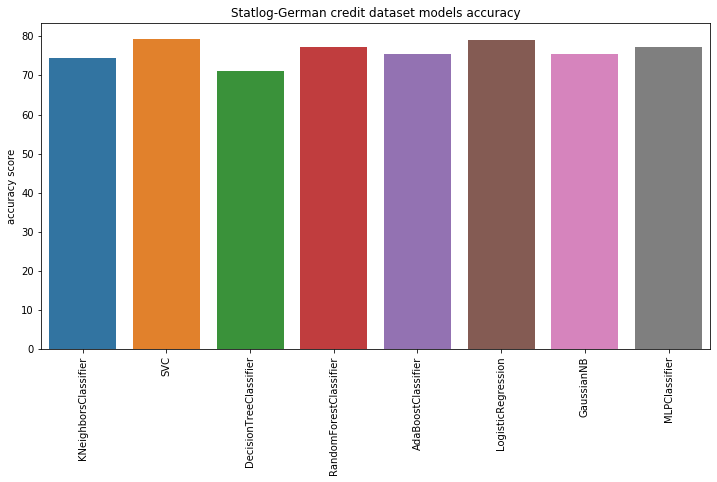

In [9]:
#Comparision graph between all models
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Statlog-German credit dataset models accuracy')